# Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Using this file for the model building purpose. 

- bigdatamart_Test.csv: Using this file for getting predictions from the trained model. 

Data We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
#Big Data Mart Train dataset

train=pd.read_csv("bigdatamart_Train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Big Data Mart Test Dataset

test=pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Variable Description

* Item_Identifier: Unique product ID
* Item_Weight: Weight of product
* Item_Fat_Content: Whether the product is low fat or not
* Item_Visibility: The % of total display area of all products in a store allocated to the particular product
* Item_Type: The category to which the product belongs
* Item_MRP: Maximum Retail Price (list price) of the product
* Outlet_Identifier: Unique store ID
* Outlet_Establishment_Year: The year in which store was established
* Outlet_Size: The size of the store in terms of ground area covered
* Outlet_Location_Type: The type of city in which the store is located
* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Exploratory Data Analysis

# 1- Data Exploration

In [4]:
print("Train data shape:", train.shape)
print("Test Data Shape", test.shape)

Train data shape: (8523, 12)
Test Data Shape (5681, 11)


* The Train dataset contains 8523 rows and 12 columns including target variables.
* The test dataset contains5681 rows and 11 features.
* After building and training the model we have to predict sales for the test data.
* We will treat both the datasets seperately and save the best model from the Train Data set and then use it to predict the Test data set Target.

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
#Checking the datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have:

* Numerical features- 

Item_Weight ,Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales.

* Categorical Features- 

Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

* We have a few null values present as per the above info.

In [7]:
#checking null values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

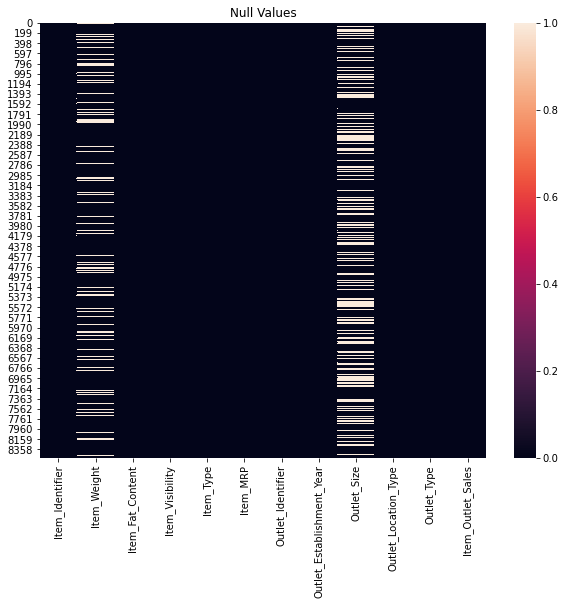

In [8]:
plt.figure(figsize=[10,8])
sns.heatmap(train.isnull())
plt.title("Null Values")
plt.show()

* we have 1463 null values in Item_weight and 2410 null values in Outlet size. We can treat them during Data cleaning.

In [9]:
#checking unique values 

train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
#checking for empty observations

train.loc[train['Item_Identifier'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [11]:
train.loc[train['Item_Fat_Content'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [12]:
train.loc[train['Item_Type'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [13]:
#checking empty observation for target variable

train.loc[train['Item_Outlet_Sales'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* There are null values in item_weight and thats why count is a little different
* We can neglect the description for Otlet Establishment year for now as it contains the Year data.
* Item_MRP has the high mean compare to other features.
* Max weight of an item is 21 and min weight is 4.5
* The maximum MRP for the dataset given is 266.88 and minimum MRP is 31.29.
* Big Mart Dataset has outlets established since 1985 to 2009.
* Mean sales is 2181.28,Standard deviation of 1706, Minimum sales is 33.29 and maximum sales value is 13086.96. This shows that in most of the outlets average sales is around 500 to 3800.

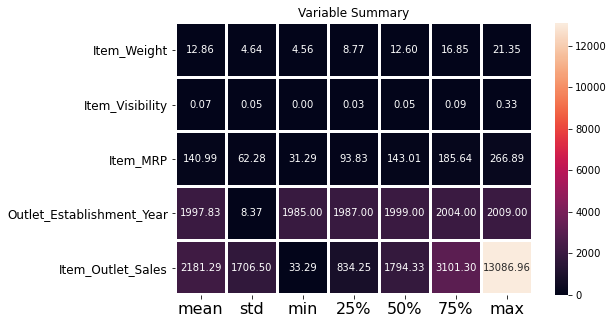

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

# 2- Data visualization

# a) Univariate Analysis

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* Numerical data: Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
* Categorical data: Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type

NUMERICAL DATA

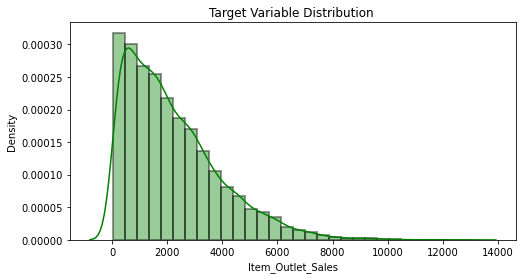

In [17]:
#distplot of target variable

plt.figure(figsize=[8,4])
sns.distplot(train["Item_Outlet_Sales"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution ')
plt.show()

* The target variable is positively skewed.

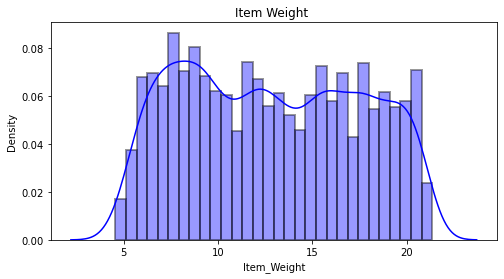

In [18]:
#distplot of Item_Weight variable

plt.figure(figsize=[8,4])
sns.distplot(train["Item_Weight"], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Item Weight ')
plt.show()

* The item weight is symmetrically distributed. it has null values

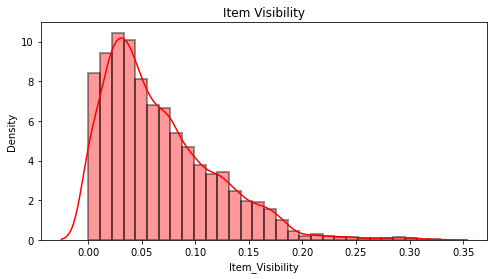

In [19]:
plt.figure(figsize=[8,4])
sns.distplot(train["Item_Visibility"], color='r',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Item Visibility')
plt.show()

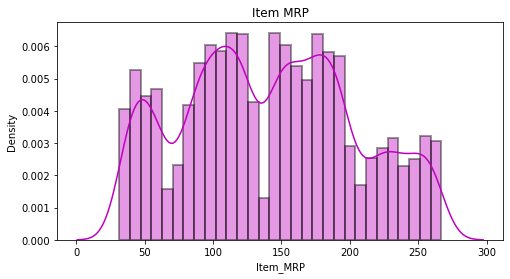

In [20]:
plt.figure(figsize=[8,4])
sns.distplot(train["Item_MRP"], color='m',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Item MRP')
plt.show()

Item_MRP has skewness present and not normally distributed

In [21]:
#Treating Outlet Establishment year to a meaningful column:

train['Outlet_Years']=2013-train['Outlet_Establishment_Year']
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4


In [22]:
# we will drop the establishment Year now

train = train.drop(["Outlet_Establishment_Year"],axis=1)
train.shape

(8523, 12)

In [23]:
train['Outlet_Years'].value_counts()

28    1463
26     932
16     930
9      930
14     930
11     929
4      928
6      926
15     555
Name: Outlet_Years, dtype: int64

* This shows the number of years since Outlet is established. 

<AxesSubplot:xlabel='Outlet_Years', ylabel='count'>

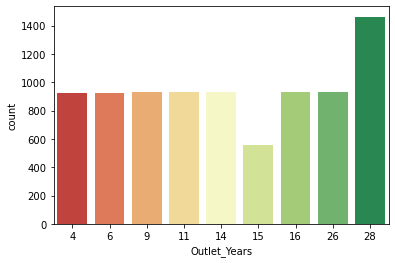

In [24]:
sns.countplot(train['Outlet_Years'],palette='RdYlGn')

* We have 1463 datas with 28 years since established date.
* The least number of data is 555 from outlets established since 15 years.
* In the given dataset There are outlets which opened for 28 years and there are outlets which was opened 4 years ago only.

Categorical Data

In [25]:
# checking the different items in Item Idemtifier
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW49     9
DRE49     9
FDO19     9
         ..
FDO33     1
FDE52     1
FDT35     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

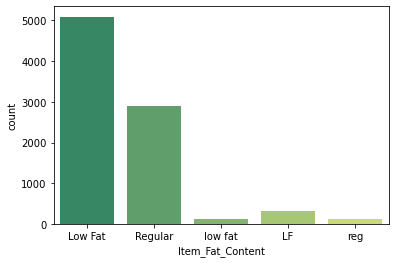

In [26]:
sns.countplot(train['Item_Fat_Content'],palette='summer')

* We have only 2 categories but the data have some mistypes.
* We can replace it with the 2 categores- Low Fat and Regular 

In [27]:
col1 = {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}
train.Item_Fat_Content.replace(col1, inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

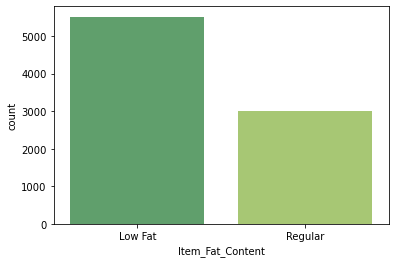

In [28]:
sns.countplot(train['Item_Fat_Content'],palette='summer')

In [29]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

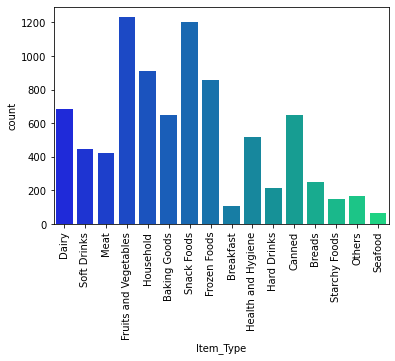

In [31]:
sns.countplot(train['Item_Type'],palette='winter')
plt.xticks(rotation = 90)

In [32]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

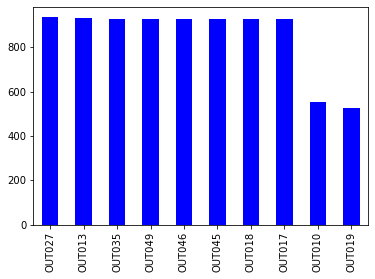

In [33]:
train.Outlet_Identifier.value_counts().plot(kind="bar",color='b')
plt.show()

 There are 10 Outlets in the Dataset.

In [34]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

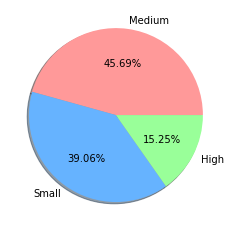

In [35]:
labels='Medium','Small','High'
colors = ['#ff9999','#66b3ff','#99ff99']
fig, ax = plt.subplots()
ax.pie(train['Outlet_Size'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

* Most of the Outlets are Medium Size. Since we have missing data for Outlet Size we can take the mode and use Medium size for null values.

In [36]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

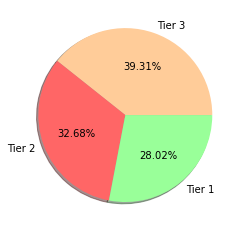

In [37]:
labels='Tier 3','Tier 2','Tier 1'
colors = ['#ffcc99','#ff6666','#99ff99']
fig, ax = plt.subplots()
ax.pie(train['Outlet_Location_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

* Most of the Outlets are in Tier 3

In [38]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

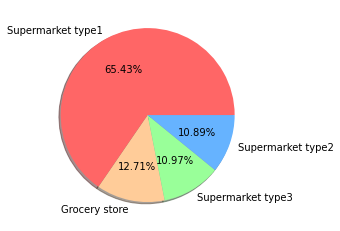

In [39]:

colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
labels='Supermarket type1','Grocery store','Supermarket type3','Supermarket type2'
fig, ax = plt.subplots()
ax.pie(train['Outlet_Type'].value_counts(), labels=labels, autopct='%1.2f%%', colors=colors,shadow=True)
plt.show()


* The maximum number of outlets have Supermarket type 1 

# b) Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Item_Visibility and Item_Outlet_Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

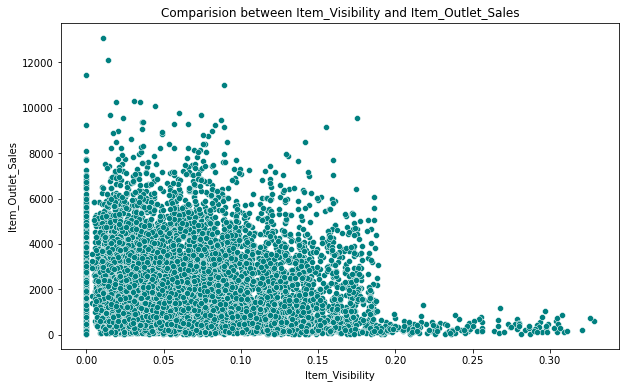

In [40]:
#Comparision between Item_Visibility and Item_Outlet_Sales

plt.figure(figsize=[10,6])
plt.title('Comparision between Item_Visibility and Item_Outlet_Sales')
sns.scatterplot(train['Item_Visibility'],train['Item_Outlet_Sales'],color='teal')

At Item visibility 0 to 0.10 the sales is very high.

<AxesSubplot:title={'center':'Comparision between Item_MRP and Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

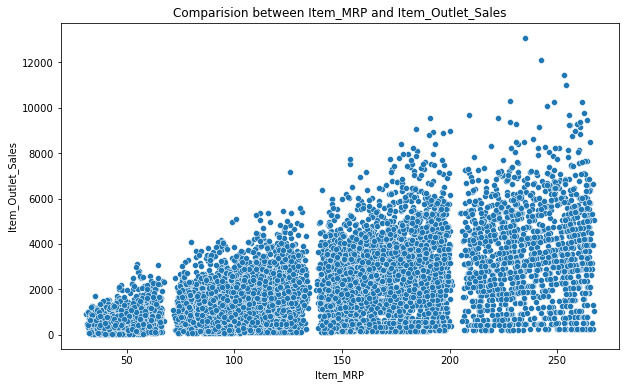

In [41]:
#Comparision between Item_MRP and Item_Outlet_Sales'

plt.figure(figsize=[10,6])
plt.title('Comparision between Item_MRP and Item_Outlet_Sales')
sns.scatterplot(train['Item_MRP'],train['Item_Outlet_Sales'],palette='blues')

* We can see that as the item MRP increases the Outlet sales also increases.

<function matplotlib.pyplot.show(close=None, block=None)>

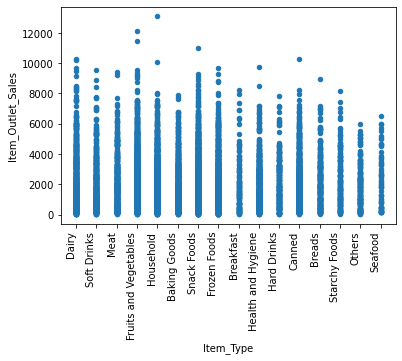

In [42]:
#item type and sales comparison

train.plot(kind='scatter',x='Item_Type',y='Item_Outlet_Sales')
locs, labels = plt.xticks()

plt.setp(labels, rotation=90,horizontalalignment='right')

plt.show

Sales are more for Dairy, Fruits and Vegetables, and Snack foods.

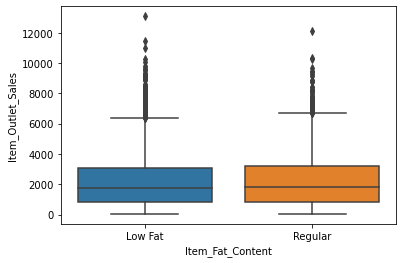

In [43]:
# Item Fat content and sales

sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

* sales is more for Regular.
* Low Fat products are tend to be more expensive

* max sales is at OUT027
* Min sales is at OUT019

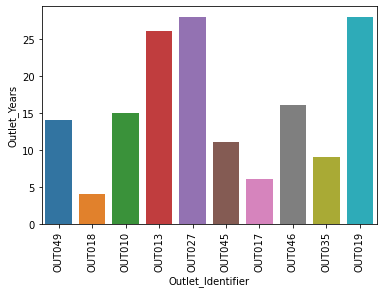

In [44]:
#Outlet_Identifier and Outlet_Years comparison

sns.barplot(train.Outlet_Identifier, train.Outlet_Years)
plt.xticks(rotation = 90)
plt.show()

* We have 2 Outlets OUT027 and OUT019 established since 28 years. 
* OUT018 is established since 4 years only

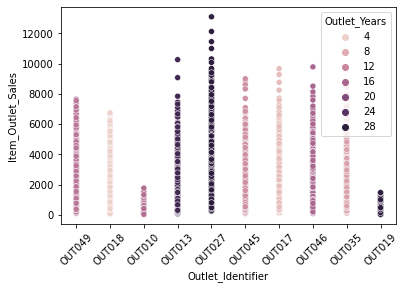

In [45]:
#Outlet years with Outlet identifiers along with sales of each outlet

sns.scatterplot(train.Outlet_Identifier, train.Item_Outlet_Sales,hue=train.Outlet_Years)
plt.xticks(rotation = 45)
plt.show()

In [46]:
train.groupby("Outlet_Identifier")["Outlet_Years"].value_counts()

Outlet_Identifier  Outlet_Years
OUT010             15              555
OUT013             26              932
OUT017             6               926
OUT018             4               928
OUT019             28              528
OUT027             28              935
OUT035             9               930
OUT045             11              929
OUT046             16              930
OUT049             14              930
Name: Outlet_Years, dtype: int64

* OUT027 and OUT019 are the oldest outlets in the dataset.
* As per the given data, value counts for each outlet is:

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528

* The sales for OUT019 is comparitively lesser. This may be due to Low data collected from that outlet or due to some other reason.

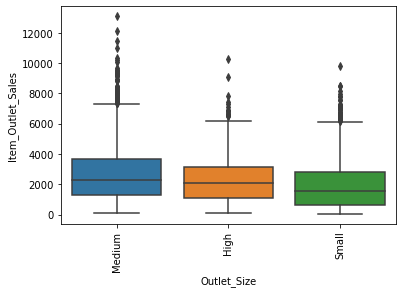

In [47]:
#Outlet size and sales comparison

sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

* As per the dataset, Number of datas with Medium is more. Hence, the sales is also more for medium size outlet

In [48]:
train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

* Accordingly,
*OUT013 which has 932 datas is in the category "High".
*Medium size outlets are OUT027, OUT049,OUT018.
*Small size outlets are OUT035, OUT046,OUT019.
*There are null values present in Outlet_size and thats why a few of the Outlets are missing in this.
*OUT019 which is working for 28 years has not only lesser data but its a small size category outlet. this might also be the reason for its least sales

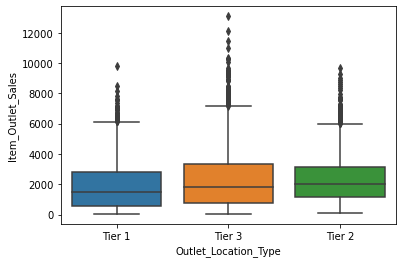

In [49]:
#Outlet location type and sales comparison

sns.boxplot(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.show()

* Most of the data has location tier 3. thats one of the reason for its increased salescompared to other 2

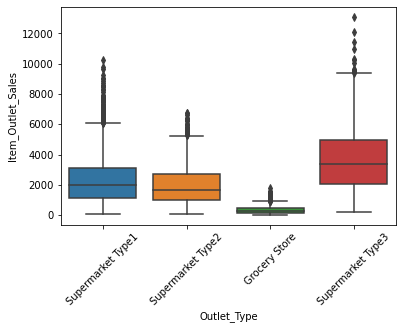

In [50]:
#Outlet type and sales comparison

sns.boxplot(train.Outlet_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 45)
plt.show()

In [51]:
train.groupby("Outlet_Size")["Outlet_Type"].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

From above 2 figures, we can see that:
* Even though there are more data for supermarket type 1, the sales is more for supermarket type 3. 
* This maybe due to other reasons such as Years of operation.
* Grocery store has least data and also least sales.

# c) Multivariate analysis

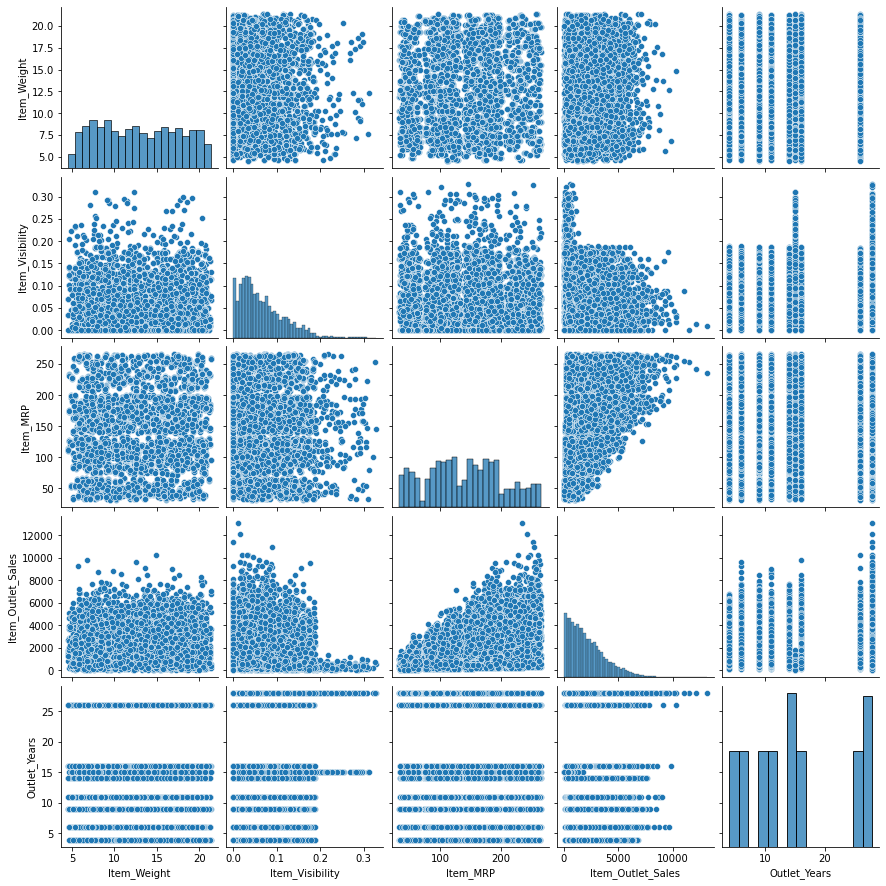

In [52]:
sns.pairplot(train)

* Item weight and sales do not have any correlation. Even if weight is increased or decreased, sales do not have any influence.
* Sales is more when item visibility have a lower value.Sales is getting reduced when visibility is more than0.15
* Sales increase as item MRP increases.
* As outlet years increases, Outlet sales also increases.

# 3- Data cleaning and Feature Engineering

# a)Treating Missing values

In [53]:
#imputing item weight using Mean and outlet size using mode

train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [54]:
train.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Years            0
dtype: int64

All null values are removed.

# b)Checking Outliers and removing them

<function matplotlib.pyplot.show(close=None, block=None)>

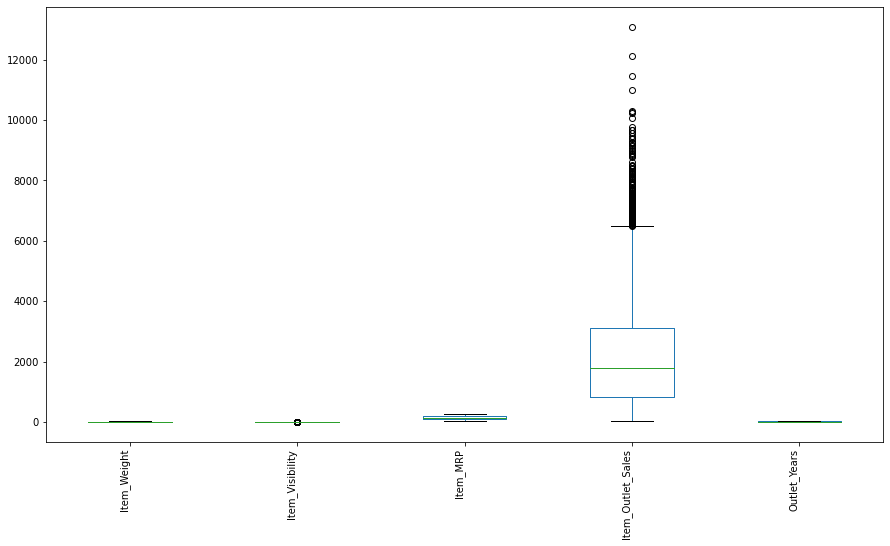

In [55]:
train.plot(kind='box',figsize=(15,8))
locs, labels = plt.xticks()

plt.setp(labels, rotation=90,horizontalalignment='right')

plt.show

There are few outliers in item visibility and our target column (which we can ignore)

In [56]:
#zscore method

from scipy.stats import zscore
z=np.abs(zscore(train[["Item_Visibility"]]))
train_new=train[(z<3).all(axis=1)]
train_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


In [57]:
print(train.shape)
print(train_new.shape)

(8523, 12)
(8428, 12)


In [58]:
loss_percentage=(((8523-8428)/8523)*100)
loss_percentage

1.1146309984747156

We can proceed with the new dataset as loss percentage is 1%only.

# c) Skewness

In [59]:
train_new.skew()

Item_Weight          0.089907
Item_Visibility      0.795956
Item_MRP             0.128945
Item_Outlet_Sales    1.173070
Outlet_Years         0.409186
dtype: float64

skewness present in item visibility

In [60]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method='yeo-johnson')
cols=['Item_Visibility']
train_new[cols] = transform.fit_transform(train_new[cols].values)

In [61]:
train_new.skew()

Item_Weight          0.089907
Item_Visibility      0.115444
Item_MRP             0.128945
Item_Outlet_Sales    1.173070
Outlet_Years         0.409186
dtype: float64

Skewness is removed in item visibility. we can ignore skewness in target

# d) Correlation

In [62]:
train_new.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.009687,0.024435,0.010575,0.008377
Item_Visibility,-0.009687,1.000000,0.004299,-0.076931,0.034066
Item_MRP,0.024435,0.004299,1.000000,0.573491,-0.006989
Item_Outlet_Sales,0.010575,-0.076931,0.573491,1.000000,0.060149
Outlet_Years,0.008377,0.034066,-0.006989,0.060149,1.000000


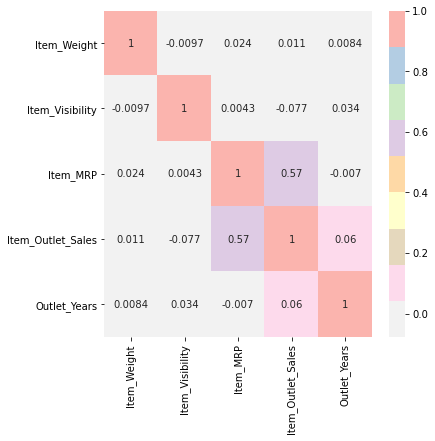

In [63]:
corr = train_new.corr()
plt.figure(figsize=(6,6), facecolor='white')
sns.heatmap(corr, annot=True,cmap='Pastel1_r')
plt.show()

* Multicollinearity is less
* Sales have highest correlation with Item MRP at 0.57
* Least correlation of Sales with Item visibility and item weight

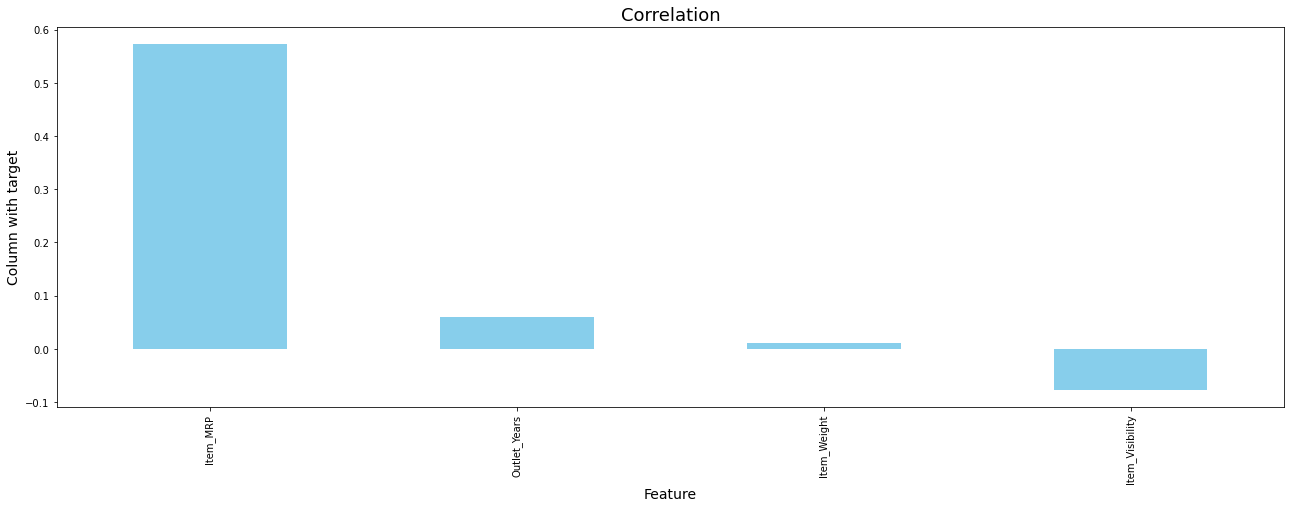

In [64]:
plt.figure(figsize=(22,7))
train_new.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='skyblue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

* Since item weight is least correlated and it doesnt effect the target variable, I am removing it for the final data.

In [65]:
train_new = train_new.drop(["Item_Weight"],axis=1)
train_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,Low Fat,-1.142270,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,Regular,-1.032913,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,Low Fat,-1.117874,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,Regular,-1.734798,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,Low Fat,-1.734798,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


# e) Encoding the Categorical data

In [66]:
from sklearn.preprocessing import LabelEncoder
lencode = {}
categorical = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical:
    lencode[column] = LabelEncoder()
    train_new[column] = lencode[column].fit_transform(train_new[column])

In [67]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8428 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8428 non-null   int64  
 1   Item_Fat_Content      8428 non-null   int64  
 2   Item_Visibility       8428 non-null   float64
 3   Item_Type             8428 non-null   int64  
 4   Item_MRP              8428 non-null   float64
 5   Outlet_Identifier     8428 non-null   int64  
 6   Outlet_Size           8428 non-null   int64  
 7   Outlet_Location_Type  8428 non-null   int64  
 8   Outlet_Type           8428 non-null   int64  
 9   Item_Outlet_Sales     8428 non-null   float64
 10  Outlet_Years          8428 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 790.1 KB


# f) Data Preprocessing

In [68]:
x = train_new.drop("Item_Outlet_Sales",axis=1)
y = train_new["Item_Outlet_Sales"]

In [69]:
x

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,156,0,-1.142270,4,249.8092,9,1,0,1,14
1,8,1,-1.032913,14,48.2692,3,1,2,2,4
2,662,0,-1.117874,10,141.6180,9,1,0,1,14
3,1121,1,-1.734798,6,182.0950,0,1,2,0,15
4,1297,0,-1.734798,9,53.8614,1,0,2,1,26
...,...,...,...,...,...,...,...,...,...,...
8518,370,0,0.033409,13,214.5218,1,0,2,1,26
8519,897,1,-0.212619,0,108.1570,7,1,1,1,11
8520,1357,0,-0.537754,8,85.1224,6,2,1,1,9
8521,681,1,1.538309,13,103.1332,3,1,2,2,4


In [70]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8428, dtype: float64

# g) scaling the data using MinMax scaler

In [71]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [72]:
x

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0.100128,0.0,0.150584,0.266667,0.927507,1.000000,0.5,0.0,0.333333,0.416667
1,0.005135,1.0,0.178376,0.933333,0.072068,0.333333,0.5,1.0,0.666667,0.000000
2,0.424904,0.0,0.156784,0.666667,0.468288,1.000000,0.5,0.0,0.333333,0.416667
3,0.719512,1.0,0.000000,0.400000,0.640093,0.000000,0.5,1.0,0.000000,0.458333
4,0.832478,0.0,0.000000,0.600000,0.095805,0.111111,0.0,1.0,0.333333,0.916667
...,...,...,...,...,...,...,...,...,...,...
8423,0.237484,0.0,0.449370,0.866667,0.777729,0.111111,0.0,1.0,0.333333,0.916667
8424,0.575738,1.0,0.386845,0.000000,0.326263,0.777778,0.5,0.5,0.333333,0.291667
8425,0.870988,0.0,0.304215,0.533333,0.228492,0.666667,1.0,0.5,0.333333,0.208333
8426,0.437099,1.0,0.831823,0.866667,0.304939,0.333333,0.5,1.0,0.666667,0.000000


# 4- Model Building

In [73]:
#importing Libraries for testing and predicting

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',i)

The max accuracy is 0.5342548472158076 seen for random state: 99


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [76]:
#Linear Regression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())


The r2 score is: 0.5342548472158076
The mean absolute error 883.2326578703811
The mean squared error 1371275.4263616197
The cross validation score 0.504561286929746


In [77]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(fit_intercept=False, normalize=True)
The best score: 0.4909870667917387
The best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [78]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))
cv = cross_val_score(grid_lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5342548472158076
The mean absolute error 883.2326578703811
The mean squared error 1371275.4263616197
The cross validation score 0.5044594661125721


# The error is very high.

In [79]:
#Lasso Regularization

ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [80]:
pred = ls.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ls, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5345521708229354
The mean absolute error 882.4115006494798
The mean squared error 1370400.0279732647
The cross validation score 0.5047309845556398


In [81]:
#Lasso has very less score and high error. applying GridsearchCV to improve accuracy

param = {'alpha': np.arange(0.0001,0.1,0.001)}
grid_ls= GridSearchCV(estimator=ls,param_grid=param,n_jobs=2,cv=5,verbose=2)

grid_ls.fit(x_train,y_train)
pred1 = grid_ls.predict(x_test)
print("The best estimators:", grid_ls.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_ls.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best estimators: Lasso(alpha=0.09910000000000001)
The r2 score is: 0.5342891406822667
The best score: 0.4908331412442265


In [82]:
ls = Lasso(alpha=0.0991)
ls.fit(x_train,y_train)
pred = ls.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ls, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5342891406822667
The mean absolute error 883.1454015412655
The mean squared error 1371174.457435676
The cross validation score 0.5045835330488954


In [83]:
#KNN Algorithm

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(knn, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5250876371714374
The mean absolute error 836.0978448556742
The mean squared error 1398266.0880721994
The cross validation score 0.5060268097215176


In [84]:
#applying GridsearchCV to improve accuracy

param = {'algorithm':['kd_tree'], 
         'n_neighbors':[3,2,4,6,8,10,14,7,11]}
grid_knn = GridSearchCV(estimator=knn, param_grid=param)
grid_knn.fit(x_train,y_train)

grid_knn.fit(x_train,y_train)

pred1 = grid_knn.predict(x_test)

print("The best estimators:", grid_knn.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_knn.best_score_)

The best estimators: KNeighborsRegressor(algorithm='kd_tree', n_neighbors=14)
The r2 score is: 0.5680687862868943
The best score: 0.5332411546782513


In [85]:
#Random Forest Regressor

rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)
y_pred = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5808420535418444
The mean absolute error 779.7757535840252
The mean squared error 1234110.5179651733
The cross validation score 0.5470959390350215


In [86]:
#Support vector Regressor

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(svr, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.030460240334930888
The cross validation score 0.030967681133090497


In [87]:
#SGD Regressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.533293407216183
The cross validation score 0.5041960897608572


# Only random forest regressor has the score a bit higher 58.08% and cross validation score of 54.70%. We can take that as our final model

In [88]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',i)

The max accuracy is 0.5852796891096808 seen for random state: 99


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

In [91]:
#hyperparameter tuning for RandomForest regressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
pred1 = grid_search.predict(x_test)

print("The best estimators:", grid_search.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_search.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
The best estimators: RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=200)
The r2 score is: 0.6035104177543729
The best score: 0.5766035639171909


In [92]:
Final_Model=RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=5,min_samples_split=12, n_estimators=200)
Final_Model.fit(x_train,y_train)
pred=Final_Model.predict(x_test)
acc= r2_score(y_test,pred)
print('The r2 score is:', acc*100)
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', (cv.mean()*100))

The r2 score is: 60.274137031123
The mean absolute error 1782.0101959280348
The mean squared error 5164722.294224716
The cross validation score 54.659106776727754


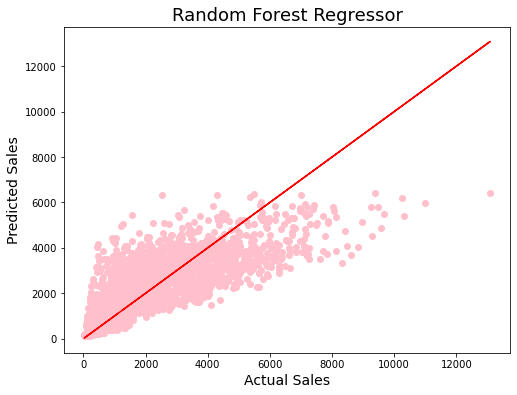

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='pink')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# 5- Saving the Model for forecasting

In [94]:
import joblib
joblib.dump(Final_Model,"Big_Data_Mart_Sales.pkl")

['Big_Data_Mart_Sales.pkl']

# Test Data

In [95]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [96]:
test.shape

(5681, 11)

We have 5681 rows and 11 columns. Target is not present and we have to find the target using the saved model.

In [97]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


* We have null values in Item weight and Outlet size.
* As in train dataset, we have numerical values for Item weight, Item visibility, Item MRP, and Outlet size.
* We have categorical values for Item_Identifier', 'Item_Fat_Content',Item_Type, 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type

In [99]:
#checking null values

test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [100]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [101]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


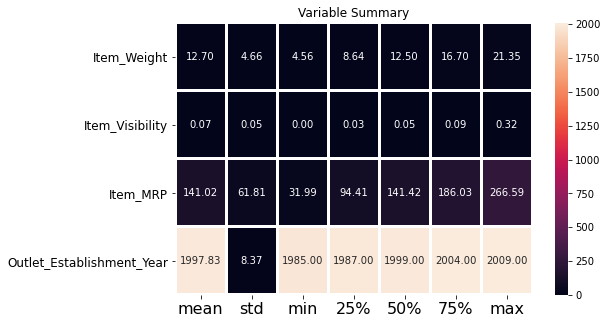

In [102]:
plt.figure(figsize=(8,5))
sns.heatmap(round(test.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

In [103]:
#Treating Outlet Establishment year to a meaningful column:

test['Outlet_Years']=2013-test['Outlet_Establishment_Year']
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6


In [104]:
# we will drop the establishment Year now

test = test.drop(["Outlet_Establishment_Year"],axis=1)
test.shape

(5681, 11)

In [105]:
test['Outlet_Years'].value_counts()

28    976
26    621
16    620
9     620
14    620
11    619
4     618
6     617
15    370
Name: Outlet_Years, dtype: int64

In [106]:
test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [107]:
#checking fat content column for mistypes

test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [108]:
col1 = {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}
test.Item_Fat_Content.replace(col1, inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

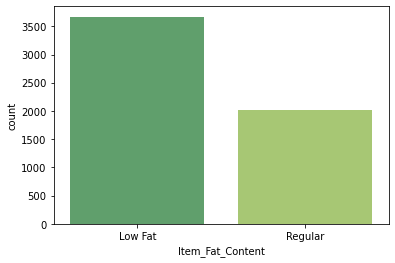

In [109]:
sns.countplot(test['Item_Fat_Content'],palette='summer')

# Missing Values

In [110]:
#imputing item weight using Mean and outlet size using mode

test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [111]:
test.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Years            0
dtype: int64

# Outliers Removal

<function matplotlib.pyplot.show(close=None, block=None)>

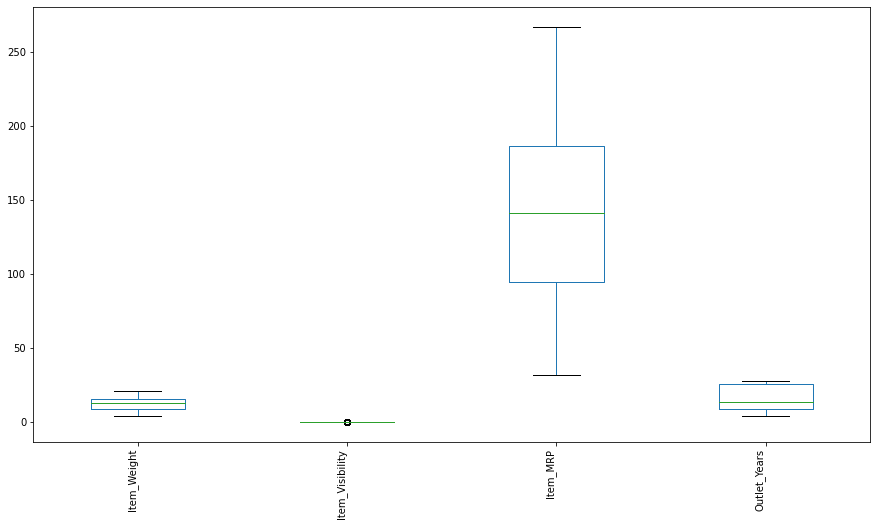

In [112]:
test.plot(kind='box',figsize=(15,8))
locs, labels = plt.xticks()

plt.setp(labels, rotation=90,horizontalalignment='right')

plt.show

In [113]:
#zscore method

from scipy.stats import zscore
z=np.abs(zscore(test[["Item_Visibility"]]))
test_new=test[(z<3).all(axis=1)]
test_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


In [114]:
print(test.shape)
print(test_new.shape)

(5681, 11)
(5600, 11)


In [115]:
loss_percentage=(((5681-5600)/5681)*100)
loss_percentage

1.425805315965499

Proceeding with new data as loss is 1% only

# Skewness

In [116]:
test_new.skew()

Item_Weight        0.140901
Item_Visibility    0.787861
Item_MRP           0.133061
Outlet_Years       0.411451
dtype: float64

We have skewness in item visibility

In [117]:

cols=['Item_Visibility']
test_new[cols] = transform.transform(test_new[cols].values)

In [118]:
test_new.skew()

Item_Weight        0.140901
Item_Visibility    0.097043
Item_MRP           0.133061
Outlet_Years       0.411451
dtype: float64

skewness is removed

In [119]:
#dropping item weight

test_new = test_new.drop(["Item_Weight"],axis=1)
test_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,Low Fat,-1.444832,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,Regular,-0.445063,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,Low Fat,0.897415,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,Low Fat,-1.164960,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,Regular,1.193441,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


# Encoding

In [120]:

categorical = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical:
    test_new[column] = lencode[column].transform(test_new[column])

In [121]:
test_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1114,0,-1.444832,13,107.8622,9,1,0,1,14
1,1078,1,-0.445063,4,87.3198,2,1,1,1,6
2,1420,0,0.897415,11,241.7538,0,1,2,0,15
3,817,0,-1.164960,13,155.0340,2,1,1,1,6
4,1197,1,1.193441,4,234.2300,5,1,2,3,28


In [122]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       5600 non-null   int64  
 1   Item_Fat_Content      5600 non-null   int64  
 2   Item_Visibility       5600 non-null   float64
 3   Item_Type             5600 non-null   int64  
 4   Item_MRP              5600 non-null   float64
 5   Outlet_Identifier     5600 non-null   int64  
 6   Outlet_Size           5600 non-null   int64  
 7   Outlet_Location_Type  5600 non-null   int64  
 8   Outlet_Type           5600 non-null   int64  
 9   Outlet_Years          5600 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 481.2 KB


# Scaling

In [123]:

test_new = pd.DataFrame(mms.transform(test_new), columns=test_new.columns)

In [124]:
test_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0.715019,0.0,0.073692,0.866667,0.325012,1.000000,0.5,0.0,0.333333,0.416667
1,0.691913,1.0,0.327772,0.266667,0.237819,0.222222,0.5,0.5,0.333333,0.083333
2,0.911425,0.0,0.668947,0.733333,0.893316,0.000000,0.5,1.0,0.000000,0.458333
3,0.524390,0.0,0.144818,0.866667,0.525233,0.222222,0.5,0.5,0.333333,0.083333
4,0.768293,1.0,0.744179,0.266667,0.861381,0.555556,0.5,1.0,1.000000,1.000000


In [125]:
test_new.shape

(5600, 10)

In [126]:
#Loading the saved model

Model=joblib.load("Big_Data_Mart_Sales.pkl")

In [127]:
predict_test=Model.predict(test_new) 
print(predict_test)

[1655.33937902 1315.92953679  649.16056071 ... 1947.86469823 4138.66465775
 1298.46022459]


In [128]:
#lets make a dataframe for test predicted sales

Sales_Test=pd.DataFrame(data=predict_test)
Sales_Test

,0
0,1655.339379
1,1315.929537
2,649.160561
3,2423.515928
4,5596.864409
...,...
5595,2306.923895
5596,2598.801015
5597,1947.864698
5598,4138.664658


In [129]:
test_new['Item_Outlet_Sales_Predicted']=Sales_Test

In [130]:
test_new

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Outlet_Sales_Predicted
0,0.715019,0.0,0.073692,0.866667,0.325012,1.000000,0.5,0.0,0.333333,0.416667,1655.339379
1,0.691913,1.0,0.327772,0.266667,0.237819,0.222222,0.5,0.5,0.333333,0.083333,1315.929537
2,0.911425,0.0,0.668947,0.733333,0.893316,0.000000,0.5,1.0,0.000000,0.458333,649.160561
3,0.524390,0.0,0.144818,0.866667,0.525233,0.222222,0.5,0.5,0.333333,0.083333,2423.515928
4,0.768293,1.0,0.744179,0.266667,0.861381,0.555556,0.5,1.0,1.000000,1.000000,5596.864409
...,...,...,...,...,...,...,...,...,...,...,...
5595,0.149551,1.0,0.128071,0.866667,0.467004,0.888889,1.0,0.0,0.333333,0.500000,2306.923895
5596,0.197689,1.0,0.825174,1.000000,0.585126,0.333333,0.5,1.0,0.666667,0.000000,2598.801015
5597,0.915276,0.0,0.544798,0.533333,0.371199,0.777778,0.5,0.5,0.333333,0.291667,1947.864698
5598,0.334403,1.0,0.000000,0.200000,0.778154,0.222222,0.5,0.5,0.333333,0.083333,4138.664658


In [131]:
test_new.to_csv("Big_Data_Mart_Test_Predicted.csv",index=False)

# Saved the File to a new CSV